In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

#tensorflow pytorch

warnings.filterwarnings('ignore')

# Fitting Width Vs. Height

In [2]:
allShots = pd.read_pickle("output/MAST-U_pedestal_allShots.pkl")

In [3]:
allShots['elong'].shape

(71957,)

In [4]:
allShots.keys()

dict_keys(['Shot', 'Times', 'W_ped', 'Beta_ped', 'W_ped_psin_te', 'W_ped_psin_ne', 'W_ped_psin_pe', 'H_ped_psin_te', 'H_ped_psin_ne', 'H_ped_psin_pe', 'W_ped_radius_te', 'W_ped_radius_ne', 'W_ped_radius_pe', 'H_ped_radius_te', 'H_ped_radius_ne', 'H_ped_radius_pe', 'Aratio', 'elong', 'delta'])

In [5]:
allShots['Beta_ped']

array([0.01053872, 0.02420952, 0.00309099, ..., 0.01218745, 0.01671536,
       0.0485085 ])

In [31]:
df = pd.DataFrame(np.transpose([allShots['Beta_ped']/allShots['W_ped'],allShots['W_ped'], allShots['Beta_ped'],  allShots['elong'], allShots['delta']]), columns =['Slope','Width', 'Height',  'Elongation', 'Triangularity'])
df = df[df['Height'] > df['Width']* 0.75] 
df = df[df['Width']<0.1]
df =df[df['Height']<0.35]
df = df[df['Slope']!= np.inf]
df.replace([np.inf, -np.inf], None)
df = df.dropna()


In [32]:
df.head()

,Slope,Width,Height,Elongation,Triangularity
22,0.867187,0.022123,0.019185,2.102782,0.475426
23,1.186517,0.050414,0.059817,2.082854,0.475694
24,1.348116,0.040710,0.054882,2.089521,0.475653
25,1.625763,0.043784,0.071183,2.081973,0.477411
26,1.359273,0.051775,0.070376,2.084107,0.480675


In [33]:
XparamWidth = df.iloc[:,1:2].values
XparamWidth

array([[0.02212281],
       [0.05041375],
       [0.04071038],
       ...,
       [0.01683109],
       [0.05834176],
       [0.05092664]])

In [34]:
yparamHeight = df.iloc[:,2].values
yparamHeight

array([0.01918461, 0.05981675, 0.05488234, ..., 0.01526855, 0.04648521,
       0.0423641 ])

In [61]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
 
# # Check for and handle categorical variables
# label_encoder = LabelEncoder()
# x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
# x_numerical = df.select_dtypes(exclude=['object']).values
# x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values
# print(x[0])
 
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=1, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(XparamWidth, yparamHeight)

RandomForestRegressor(n_estimators=1, oob_score=True, random_state=0)

In [62]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
 
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = regressor.predict(XparamWidth)
 
# Evaluating the model
mse = mean_squared_error(yparamHeight, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(yparamHeight, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: -2.212927442712049
Mean Squared Error: 0.002317052827225569
R-squared: 0.50774358525481


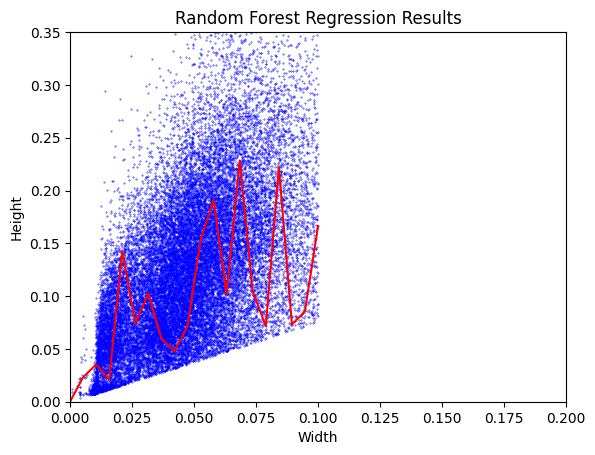

In [70]:
import numpy as np
#X_grid = np.arange(min(X),max(X),0.01)
X_grid = np.linspace(0, 0.1, 20)
X_grid = X_grid.reshape(len(X_grid),1) 
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'black', 'grey', 'white']
plt.scatter(df['Width'], df['Height'], color='blue', s=0.1) #plotting real points
# for i in range(50):
#     elong = np.ones(len(X_grid), dtype=float)*2
#     elong =elong.reshape(len(X_grid), 1)
#     delta = np.ones(len(X_grid), dtype=float)*(0.33+0.02*i)
#     delta =delta.reshape(len(X_grid), 1)
#     altogether = np.concatenate((X_grid, elong, delta), axis = 1)
#     plt.plot(X_grid, regressor.predict(altogether),color=(0.5+0.01*i, 0, 0)) #plotting for predict points

plt.plot(X_grid, regressor.predict(X_grid),color=(1, 0, 0)) #plotting for predict points

plt.xlim(0, .2)
plt.ylim(0, .35)
plt.title("Random Forest Regression Results")
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

# Making a more flexible situation

In [258]:
def randomForest(mainx, xparams, yparam, deltaDefault = 0.5, heightDefault=0.1, colorIndex = 0):
    #read pkl into df
    allShots = pd.read_pickle("output/MAST-U_pedestal_allShots.pkl")
    df = pd.DataFrame(np.transpose([allShots['Beta_ped']/allShots['W_ped'],allShots['W_ped'], allShots['Beta_ped'],  allShots['elong'], allShots['delta']]), columns =['Slope','Width', 'Height',  'Elong', 'Delta'])

    # clean data 
    # filter L-mode
    df = df[df['Height'] > df['Width']* 0.75] 
    # limit spread to area around blob
    df = df[df['Width']<0.1]
    df = df[df['Height']<0.35]
    df = df[df['Slope']!= np.inf]
    df.replace([np.inf, -np.inf], None)
    df = df.dropna()
    colNums = {'Slope':0, 'Width':1, 'Height':2, 'Elong':3, 'Delta':4}
    concatList = []
    totalParams = [mainx]+ xparams 
    # print(totalParams)
    for i in totalParams:
        concatList += [df.iloc[:,colNums[i]:colNums[i]+1]]
    # print(concatList)
    # print(np.concatenate(concatList, axis=1))
    X = np.concatenate(concatList, axis=1)
    colNums = {'Slope':0, 'Width':1, 'Height':2, 'Elong':3, 'Delta':4}
    y = df.iloc[:,colNums[yparam]:colNums[yparam]+1]

    
    # # Check for and handle categorical variables
    # label_encoder = LabelEncoder()
    # x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
    # x_numerical = df.select_dtypes(exclude=['object']).values
    # x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values
    # print(x[0])
    
    # Fitting Random Forest Regression to the dataset
    regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
    
    # Fit the regressor with x and y data
    regressor.fit(X, y)
    # Evaluating the model
    from sklearn.metrics import mean_squared_error, r2_score
    
    # Access the OOB Score
    oob_score = regressor.oob_score_
    print(f'Out-of-Bag Score: {oob_score}')
    
    # Making predictions on the same data or new data
    predictions = regressor.predict(X)
    
    # Evaluating the model
    mse = mean_squared_error(y, predictions)
    print(f'Mean Squared Error: {mse}')
    
    r2 = r2_score(yparamHeight, predictions)
    print(f'R-squared: {r2}')


# combine dependent variables that we care about
    #X_grid = np.arange(min(X),max(X),0.01)
    minDict = {"Elong":1.8, "Width":0, "Height":0, "Delta":0.4}
    maxDict = {"Elong":2.2, "Width": 0.1, "Height":0.35, "Delta":0.6}
    X_grid = np.linspace(minDict[mainx], maxDict[mainx], 20)
    X_grid = X_grid.reshape(len(X_grid),1) 
    colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'black', 'grey', 'white']
    plt.scatter(df[mainx], df[yparam], color='blue', s=0.1) #plotting real points

    # initialize baseline independent variables
    elong = np.ones(len(X_grid), dtype=float)*2
    elong =elong.reshape(len(X_grid), 1)
    delta = np.ones(len(X_grid), dtype=float)*(deltaDefault)
    delta =delta.reshape(len(X_grid), 1)
    height = np.ones(len(X_grid), dtype=float)*heightDefault
    height =height.reshape(len(X_grid), 1)
    width = np.ones(len(X_grid), dtype=float)*(0.05)
    width =width.reshape(len(X_grid), 1)
    dependDict =  {'Width':width, 'Height':height, 'Elong':elong, 'Delta':delta}
    concatList = [X_grid]
    for i in xparams:
        concatList += [dependDict[i]]
    altogether = np.concatenate(concatList, axis = 1)
    #print(altogether)

    # for i in range(50):
        # elong = np.ones(len(X_grid), dtype=float)*2
        # elong =elong.reshape(len(X_grid), 1)
        # delta = np.ones(len(X_grid), dtype=float)*(0.33+0.02*i)
        # delta =delta.reshape(len(X_grid), 1)
        # altogether = np.concatenate((X_grid, elong, delta), axis = 1)
    #     plt.plot(X_grid, regressor.predict(altogether),color=(0.5+0.01*i, 0, 0)) #plotting for predict points

    plt.plot(X_grid, regressor.predict(altogether),color=colors[colorIndex]) #plotting for predict points
    # print(regressor.predict(altogether))
    plt.xlim((minDict[mainx], maxDict[mainx]))
    # print(minDict[yparam])
    plt.ylim(minDict[yparam], maxDict[yparam])
    plt.title("Random Forest Regression Results")
    plt.xlabel(mainx)
    plt.ylabel(yparam)
    plt.title("trained on" + str(totalParams))
    return



Out-of-Bag Score: -0.04542903185198366
Mean Squared Error: 0.0007359786820430338
R-squared: 0.8436417922394981


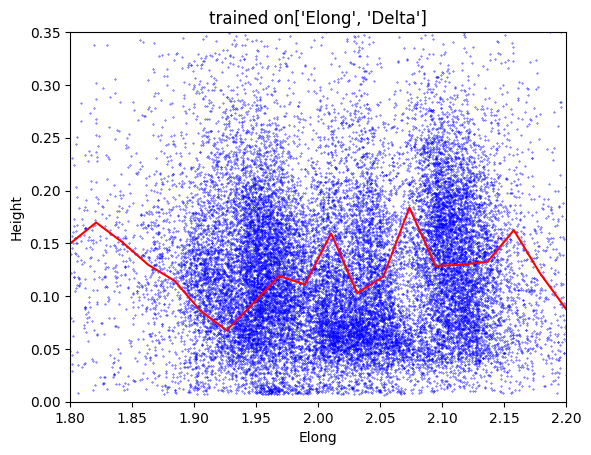

In [259]:
randomForest("Elong", ["Delta"], "Height")


Out-of-Bag Score: 0.19313702610485284
Mean Squared Error: 0.0005252841549724319
R-squared: 0.8884037119003444
Out-of-Bag Score: 0.19313702610485284
Mean Squared Error: 0.0005252841549724319
R-squared: 0.8884037119003444
Out-of-Bag Score: 0.19313702610485284
Mean Squared Error: 0.0005252841549724319
R-squared: 0.8884037119003444


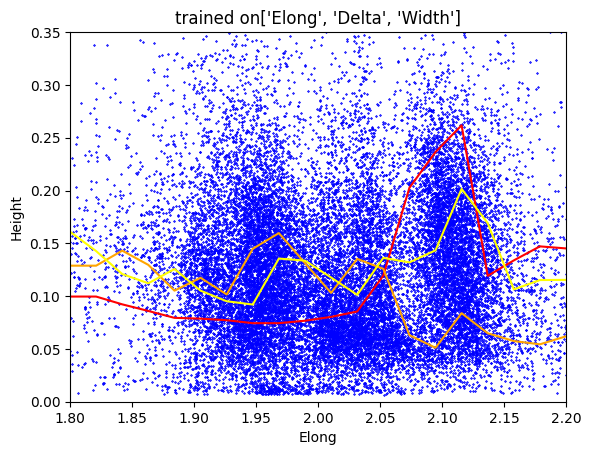

In [262]:
for i in range(3):
    randomForest("Elong", ["Delta", "Width"], "Height", deltaDefault=0.40+0.05*i, colorIndex = i)


Out-of-Bag Score: -2.9297503378682803
Mean Squared Error: 0.0027628454499490475
R-squared: -771.5396365127139
Out-of-Bag Score: -2.9297503378682803
Mean Squared Error: 0.0027628454499490475
R-squared: -771.5396365127139
Out-of-Bag Score: -2.9297503378682803
Mean Squared Error: 0.0027628454499490475
R-squared: -771.5396365127139
Out-of-Bag Score: -2.9297503378682803
Mean Squared Error: 0.0027628454499490475
R-squared: -771.5396365127139
Out-of-Bag Score: -2.9297503378682803
Mean Squared Error: 0.0027628454499490475
R-squared: -771.5396365127139
Out-of-Bag Score: -2.9297503378682803
Mean Squared Error: 0.0027628454499490475
R-squared: -771.5396365127139
Out-of-Bag Score: -2.9297503378682803
Mean Squared Error: 0.0027628454499490475
R-squared: -771.5396365127139
Out-of-Bag Score: -2.9297503378682803
Mean Squared Error: 0.0027628454499490475
R-squared: -771.5396365127139
Out-of-Bag Score: -2.9297503378682803
Mean Squared Error: 0.0027628454499490475
R-squared: -771.5396365127139
Out-of-Bag

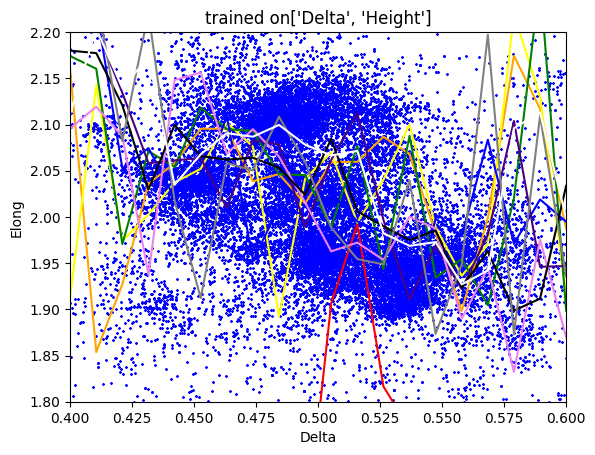

In [263]:
for i in range(10):
    randomForest("Delta", ["Height"], "Elong", heightDefault=0.02*i, colorIndex=i)

Out-of-Bag Score: -3.1146131849027734
Mean Squared Error: 0.0034385136668331835
R-squared: -771.6944248688391


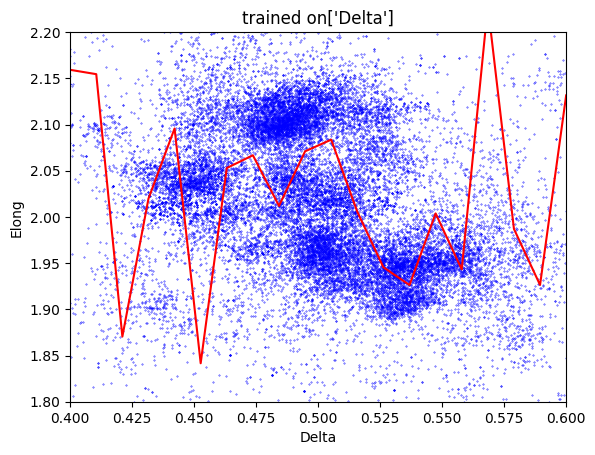

In [254]:
randomForest("Delta", [], "Elong")

In [ ]:
randomForest()